In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm, lognorm, ttest_ind
from scipy.optimize import curve_fit
from openeye import oechem
from tqdm import tqdm

In [2]:
kelly = ["#ebce2b", "#702c8c", "#db6917", "#96cde6", "#ba1c30", "#c0bd7f", "#7f7e80", "#5fa641", "#d485b2", "#4277b6", "#df8461", "#463397", "#e1a11a", "#91218c", "#e8e948", "#7e1510", "#92ae31", "#6f340d", "#d32b1e", "#2b3514",]

# Reading the csv file of benchmark run

In [3]:
df = pd.read_csv('03-metrics.csv')

In [4]:
df.columns

Index(['Force Field', 'SMILES', 'Conformer Idx', 'RMSD', 'Bond RMSD',
       'Angle RMSD', 'Dihedral RMSD', 'Improper RMSD', 'TFD', 'FB OBJECTIVE',
       'Record ID', 'ddE'],
      dtype='object')

In [5]:
# a is a list
def function_hist(a, ini, final, nbins):
    bins = np.linspace(ini, final, nbins)
    counts, bins = np.histogram(np.array(a), bins)
    return counts, bins

In [6]:
ff_list = list(df['Force Field'].unique())

# Retain indices that match a certain SMARTS pattern

In [7]:
matched_indices = []
smarts_to_search = "[#7:1]~[#16X4,#16X3+0:2](=[#8])(=[#8])~[*:3]"
ss = oechem.OESubSearch(smarts_to_search)

for i in tqdm(range(len(df))):
    smi = df.iloc[i]['SMILES']
    mol = oechem.OEGraphMol()
    oechem.OESmilesToMol(mol, smi)
    oechem.OEPrepareSearch(mol, ss)
    if ss.SingleMatch(mol):
        matched_indices.append(i)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 219903/219903 [00:32<00:00, 6810.17it/s]


In [8]:
len(matched_indices)

18780

In [9]:
hypervalent_df = df.iloc[matched_indices]
len(hypervalent_df)

18780

In [10]:
df = hypervalent_df

In [11]:
len(df)

18780

# Cumulative distributions of the metrics RMSD/TFD/ddE

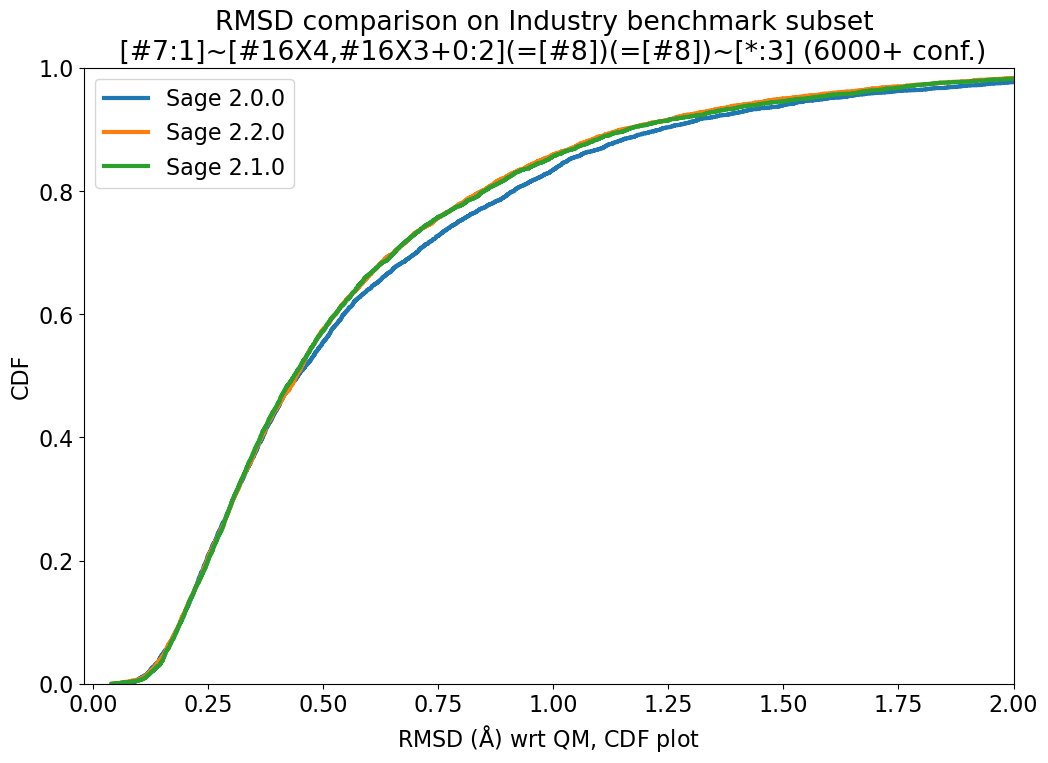

In [14]:
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 16})


for forcefield in ff_list:
    if forcefield == 'GAFF 2.11 + AM1BCC':
        sns.ecdfplot(df.loc[df['Force Field'] == forcefield]["RMSD"], linestyle='-.', linewidth=3, label=forcefield) 
    else:
        sns.ecdfplot(df.loc[df['Force Field'] == forcefield]["RMSD"], linewidth=3, label=forcefield)

plt.xlim(-0.02, 2)
plt.xlabel(r"RMSD ($\mathrm{\AA}$) wrt QM, CDF plot")
plt.ylabel("CDF")
plt.legend()
plt.title(f'RMSD comparison on Industry benchmark subset \n {smarts_to_search} ({round(int(len(df)/len(ff_list)), -3)}+ conf.)')
plt.savefig(f'CDF_plot_of_RMSD.png', dpi=300)
plt.show()

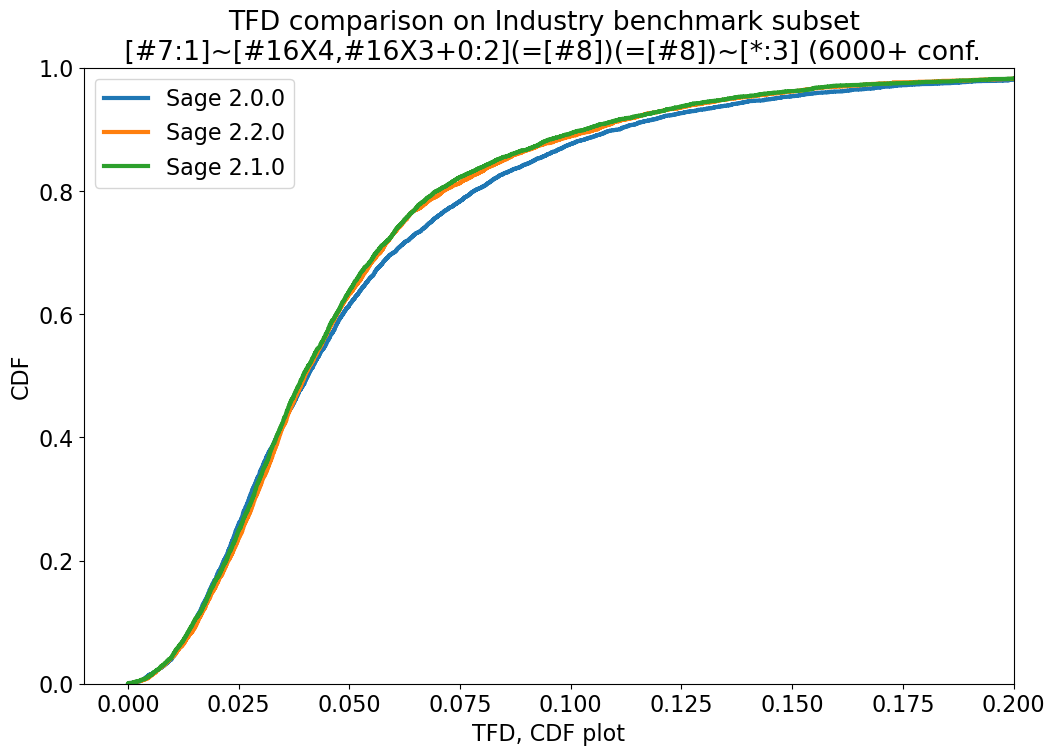

In [15]:
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 16})


for forcefield in ff_list:
    if forcefield == 'GAFF 2.11 + AM1BCC':
        sns.ecdfplot(df.loc[df['Force Field'] == forcefield]["TFD"], linestyle='-.', linewidth=3, label=forcefield)
    else:
        sns.ecdfplot(df.loc[df['Force Field'] == forcefield]["TFD"], linewidth=3, label=forcefield)

plt.xlim(-0.01, 0.2)
plt.xlabel(f"TFD, CDF plot")
plt.ylabel("CDF")
plt.legend()
plt.title(f'TFD comparison on Industry benchmark subset \n {smarts_to_search} ({round(int(len(df)/len(ff_list)), -3)}+ conf.')
plt.savefig(f'CDF_plot_of_TFD.png', dpi=300)
plt.show()

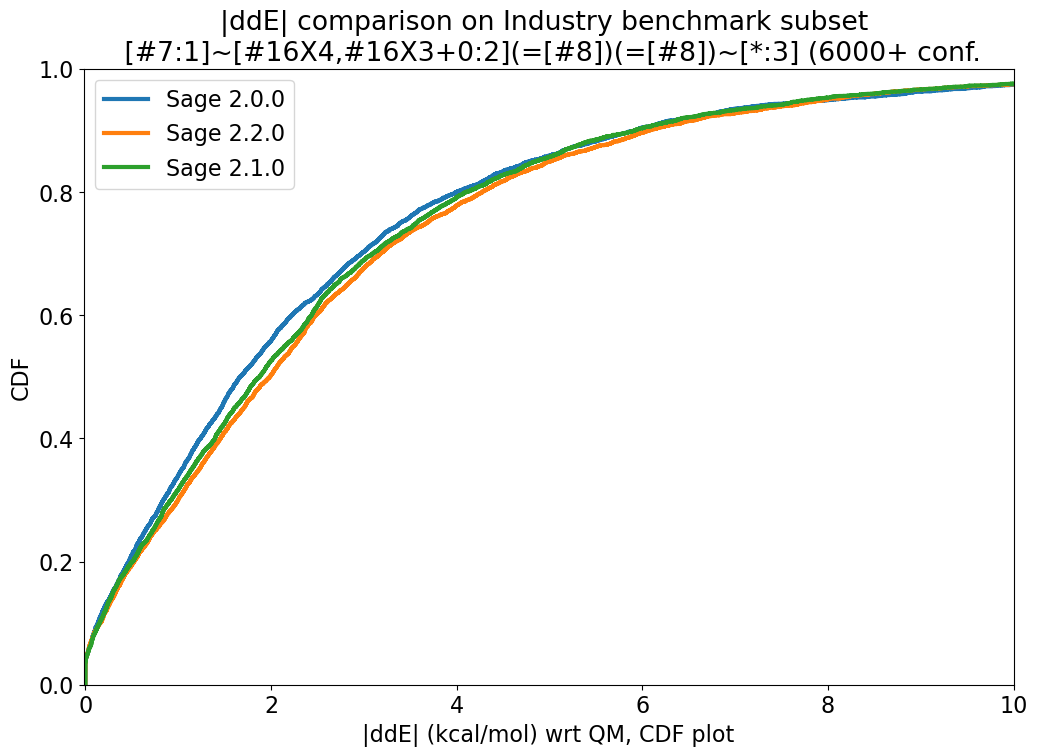

In [16]:
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 16})


for forcefield in ff_list:
    if forcefield == 'GAFF 2.11 + AM1BCC':
        sns.ecdfplot(abs(df.loc[df['Force Field'] == forcefield]["ddE"]), linestyle='-.', linewidth=3, label=forcefield)
    else:
        sns.ecdfplot(abs(df.loc[df['Force Field'] == forcefield]["ddE"]), linewidth=3, label=forcefield)

plt.xlim(-0.02, 10)
plt.xlabel(f"|ddE| (kcal/mol) wrt QM, CDF plot")
plt.ylabel("CDF")
plt.legend()
plt.title(f'|ddE| comparison on Industry benchmark subset \n {smarts_to_search} ({round(int(len(df)/len(ff_list)), -3)}+ conf.')
plt.savefig(f'CDF_plot_of_ddE.png', dpi=300)
plt.show()